In [1]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [2]:
# Define the neural network architecture with leaky ReLU activation
class OptionPricingModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, leaky_slope=0.01):
        super(OptionPricingModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.leaky_relu1 = nn.LeakyReLU(leaky_slope)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.leaky_relu2 = nn.LeakyReLU(leaky_slope)
        self.layer3 = nn.Linear(hidden_size2, hidden_size3)
        self.leaky_relu3 = nn.LeakyReLU(leaky_slope)
        self.layer4 = nn.Linear(hidden_size3, hidden_size4)
        self.leaky_relu4= nn.LeakyReLU(leaky_slope)
        self.layer5 = nn.Linear(hidden_size4, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.leaky_relu1(x)
        x = self.layer2(x)
        x = self.leaky_relu2(x)
        x = self.layer3(x)
        x = self.leaky_relu3(x)
        x = self.layer4(x)
        x = self.leaky_relu4(x)
        x = self.layer5(x)
        return x
class TmpDataset(Dataset):
    # defining values in the constructor
    def __init__(self, 
                 x, 
                 y
                ):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)
     
    # Getting the data samples
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    # Getting data size/length
    def __len__(self):
        return len(self.x)

In [17]:
model1 = torch.load('model1')
model2 = torch.load('model2')
model3 = torch.load('model3')

In [4]:
train_data = pd.read_csv('training_set.csv')
test_data = pd.read_csv('test_set.csv')
val_data = pd.read_csv('val_set.csv')

In [5]:
features = ['T', 'r', 'q', 'v0', 'theta', 'kappa', 'sigma', 'rho', 'm']
label = ['option_price']

In [6]:
bs = 1024*8
te = TmpDataset(x = test_data[features].values,
                 y = test_data[label].values)
test_dataloader = DataLoader(te, 
                              batch_size=bs, 
                              shuffle=True)

In [7]:
device = torch.device("cuda")

In [11]:
path = 'C:/min/coding_project/IE517_Machine_Learning_in_Finance_Lab/Week3/'

In [12]:
dfs = []

for i in ['kappa', 'm', 'rho', 'T', 'theta', 'v0', 'vol_vol']:
    tmp_df = pd.read_csv(path + i + '.csv')
    tmp_df['param'] = i
    dfs.append(tmp_df.copy())

In [13]:
df = pd.concat(dfs).reset_index(drop=True)
df

,T,r,q,v0,theta,kappa,sigma,rho,m,call_price,param
0,0.647059,0.05,0.02,0.05,0.15,3.528189,0.300000,-0.5,1.0,11.302708,kappa
1,0.647059,0.05,0.02,0.05,0.15,3.690235,0.300000,-0.5,1.0,11.366542,kappa
2,0.647059,0.05,0.02,0.05,0.15,0.857851,0.300000,-0.5,1.0,9.286048,kappa
3,0.647059,0.05,0.02,0.05,0.15,2.719234,0.300000,-0.5,1.0,10.919957,kappa
4,0.647059,0.05,0.02,0.05,0.15,1.998139,0.300000,-0.5,1.0,10.452242,kappa
...,...,...,...,...,...,...,...,...,...,...,...
6315,0.647059,0.05,0.02,0.05,0.15,0.800000,0.189534,-0.5,1.0,9.307843,vol_vol
6316,0.647059,0.05,0.02,0.05,0.15,0.800000,0.278424,-0.5,1.0,9.228621,vol_vol
6317,0.647059,0.05,0.02,0.05,0.15,0.800000,0.362241,-0.5,1.0,9.129966,vol_vol
6318,0.647059,0.05,0.02,0.05,0.15,0.800000,0.183931,-0.5,1.0,9.311919,vol_vol


In [14]:
bs = 1024*8
dff = TmpDataset(x = df[features].values,
                 y = df['call_price'].values)
dff

# With gradient boosting

In [19]:
df['pred'] = np.array((model1(dff[:][0].to(device)) - model2(dff[:][0].to(device)) - model3(dff[:][0].to(device))).detach().cpu())
df

,T,r,q,v0,theta,kappa,sigma,rho,m,call_price,param,pred
0,0.647059,0.05,0.02,0.05,0.15,3.528189,0.300000,-0.5,1.0,11.302708,kappa,11.304931
1,0.647059,0.05,0.02,0.05,0.15,3.690235,0.300000,-0.5,1.0,11.366542,kappa,11.372725
2,0.647059,0.05,0.02,0.05,0.15,0.857851,0.300000,-0.5,1.0,9.286048,kappa,9.287251
3,0.647059,0.05,0.02,0.05,0.15,2.719234,0.300000,-0.5,1.0,10.919957,kappa,10.903725
4,0.647059,0.05,0.02,0.05,0.15,1.998139,0.300000,-0.5,1.0,10.452242,kappa,10.411981
...,...,...,...,...,...,...,...,...,...,...,...,...
6315,0.647059,0.05,0.02,0.05,0.15,0.800000,0.189534,-0.5,1.0,9.307843,vol_vol,9.328023
6316,0.647059,0.05,0.02,0.05,0.15,0.800000,0.278424,-0.5,1.0,9.228621,vol_vol,9.249293
6317,0.647059,0.05,0.02,0.05,0.15,0.800000,0.362241,-0.5,1.0,9.129966,vol_vol,9.130548
6318,0.647059,0.05,0.02,0.05,0.15,0.800000,0.183931,-0.5,1.0,9.311919,vol_vol,9.332617


# Without gradient boosting

In [21]:
df['pred_wo'] = np.array((model1(dff[:][0].to(device))).detach().cpu())
df

,T,r,q,v0,theta,kappa,sigma,rho,m,call_price,param,pred,pred_wo
0,0.647059,0.05,0.02,0.05,0.15,3.528189,0.300000,-0.5,1.0,11.302708,kappa,11.304931,11.297770
1,0.647059,0.05,0.02,0.05,0.15,3.690235,0.300000,-0.5,1.0,11.366542,kappa,11.372725,11.362366
2,0.647059,0.05,0.02,0.05,0.15,0.857851,0.300000,-0.5,1.0,9.286048,kappa,9.287251,9.283391
3,0.647059,0.05,0.02,0.05,0.15,2.719234,0.300000,-0.5,1.0,10.919957,kappa,10.903725,10.892010
4,0.647059,0.05,0.02,0.05,0.15,1.998139,0.300000,-0.5,1.0,10.452242,kappa,10.411981,10.421864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,0.647059,0.05,0.02,0.05,0.15,0.800000,0.189534,-0.5,1.0,9.307843,vol_vol,9.328023,9.300631
6316,0.647059,0.05,0.02,0.05,0.15,0.800000,0.278424,-0.5,1.0,9.228621,vol_vol,9.249293,9.237679
6317,0.647059,0.05,0.02,0.05,0.15,0.800000,0.362241,-0.5,1.0,9.129966,vol_vol,9.130548,9.142439
6318,0.647059,0.05,0.02,0.05,0.15,0.800000,0.183931,-0.5,1.0,9.311919,vol_vol,9.332617,9.304465


In [22]:
df['error'] = df['call_price'] - df['pred']
df['error_wo'] = df['call_price'] - df['pred_wo']

In [23]:
df['param'].unique()

array(['kappa', 'm', 'rho', 'T', 'theta', 'v0', 'vol_vol'], dtype=object)

kappa


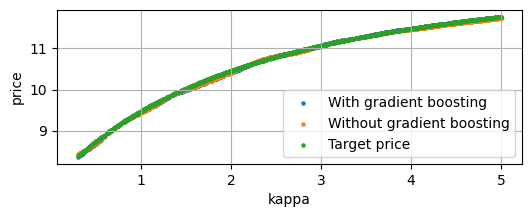

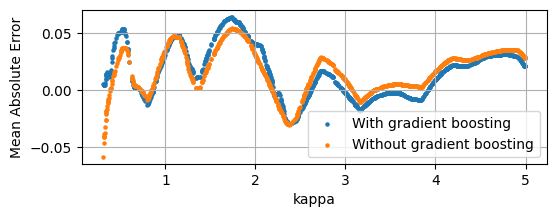

-------------------------------------
m


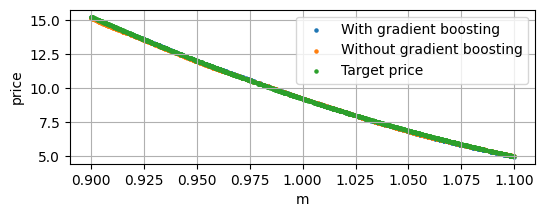

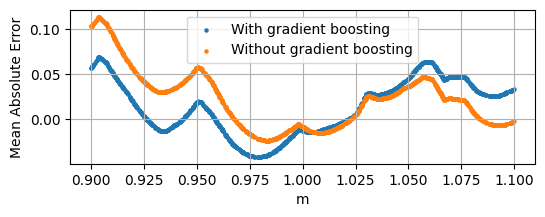

-------------------------------------
rho


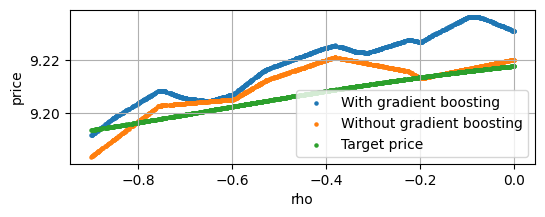

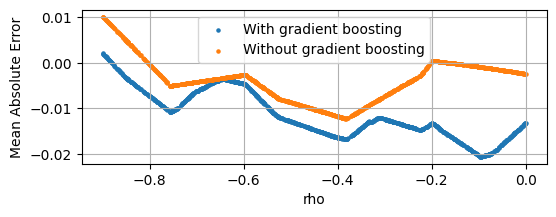

-------------------------------------
T


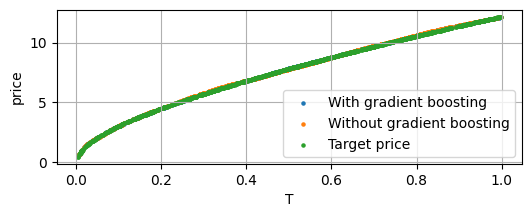

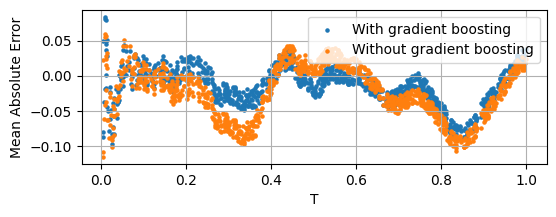

-------------------------------------
theta


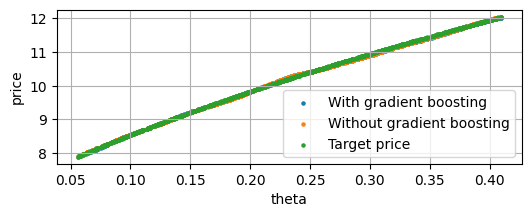

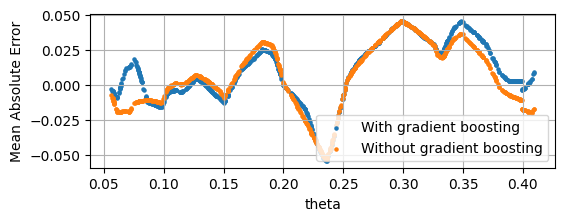

-------------------------------------
v0


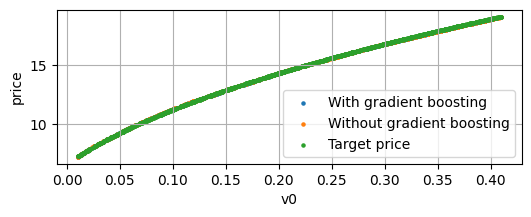

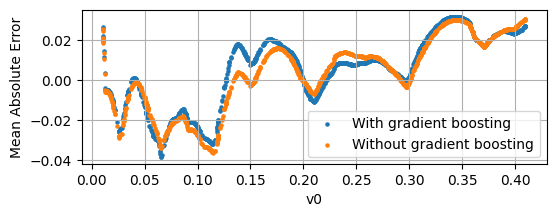

-------------------------------------
vol_vol


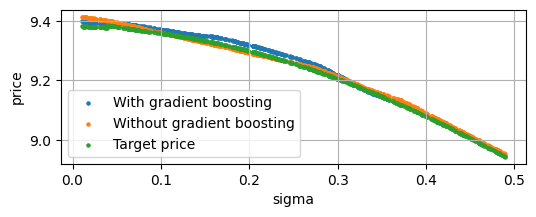

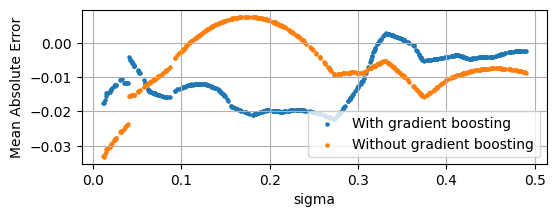

-------------------------------------


In [25]:
for i in df['param'].unique():
    print(i)

    tmp_df = df[df['param'] == i].copy()
    if i == 'vol_vol':
        i = 'sigma'
    plt.figure(figsize=(6,2))
    plt.scatter(tmp_df[i], tmp_df['pred'], s = 5, label='With gradient boosting')
    plt.scatter(tmp_df[i], tmp_df['pred_wo'], s = 5, label='Without gradient boosting')
    plt.scatter(tmp_df[i],tmp_df['call_price'], s=5, label = 'Target price')
    plt.xlabel(i)
    plt.ylabel('price')
    plt.grid()
    plt.legend()
    plt.show()
    plt.figure(figsize=(6,2))
    plt.scatter(tmp_df[i], tmp_df['error'], s = 5, label='With gradient boosting')
    plt.scatter(tmp_df[i], tmp_df['error_wo'], s = 5, label='Without gradient boosting')
    plt.xlabel(i)
    plt.ylabel('Mean Absolute Error')
    plt.grid()
    plt.legend()
    plt.show()
    print('-------------------------------------')

In [51]:
import matplotlib
plt.rcParams.update({'font.size': 16})

kappa
m
rho
T
theta
v0
vol_vol


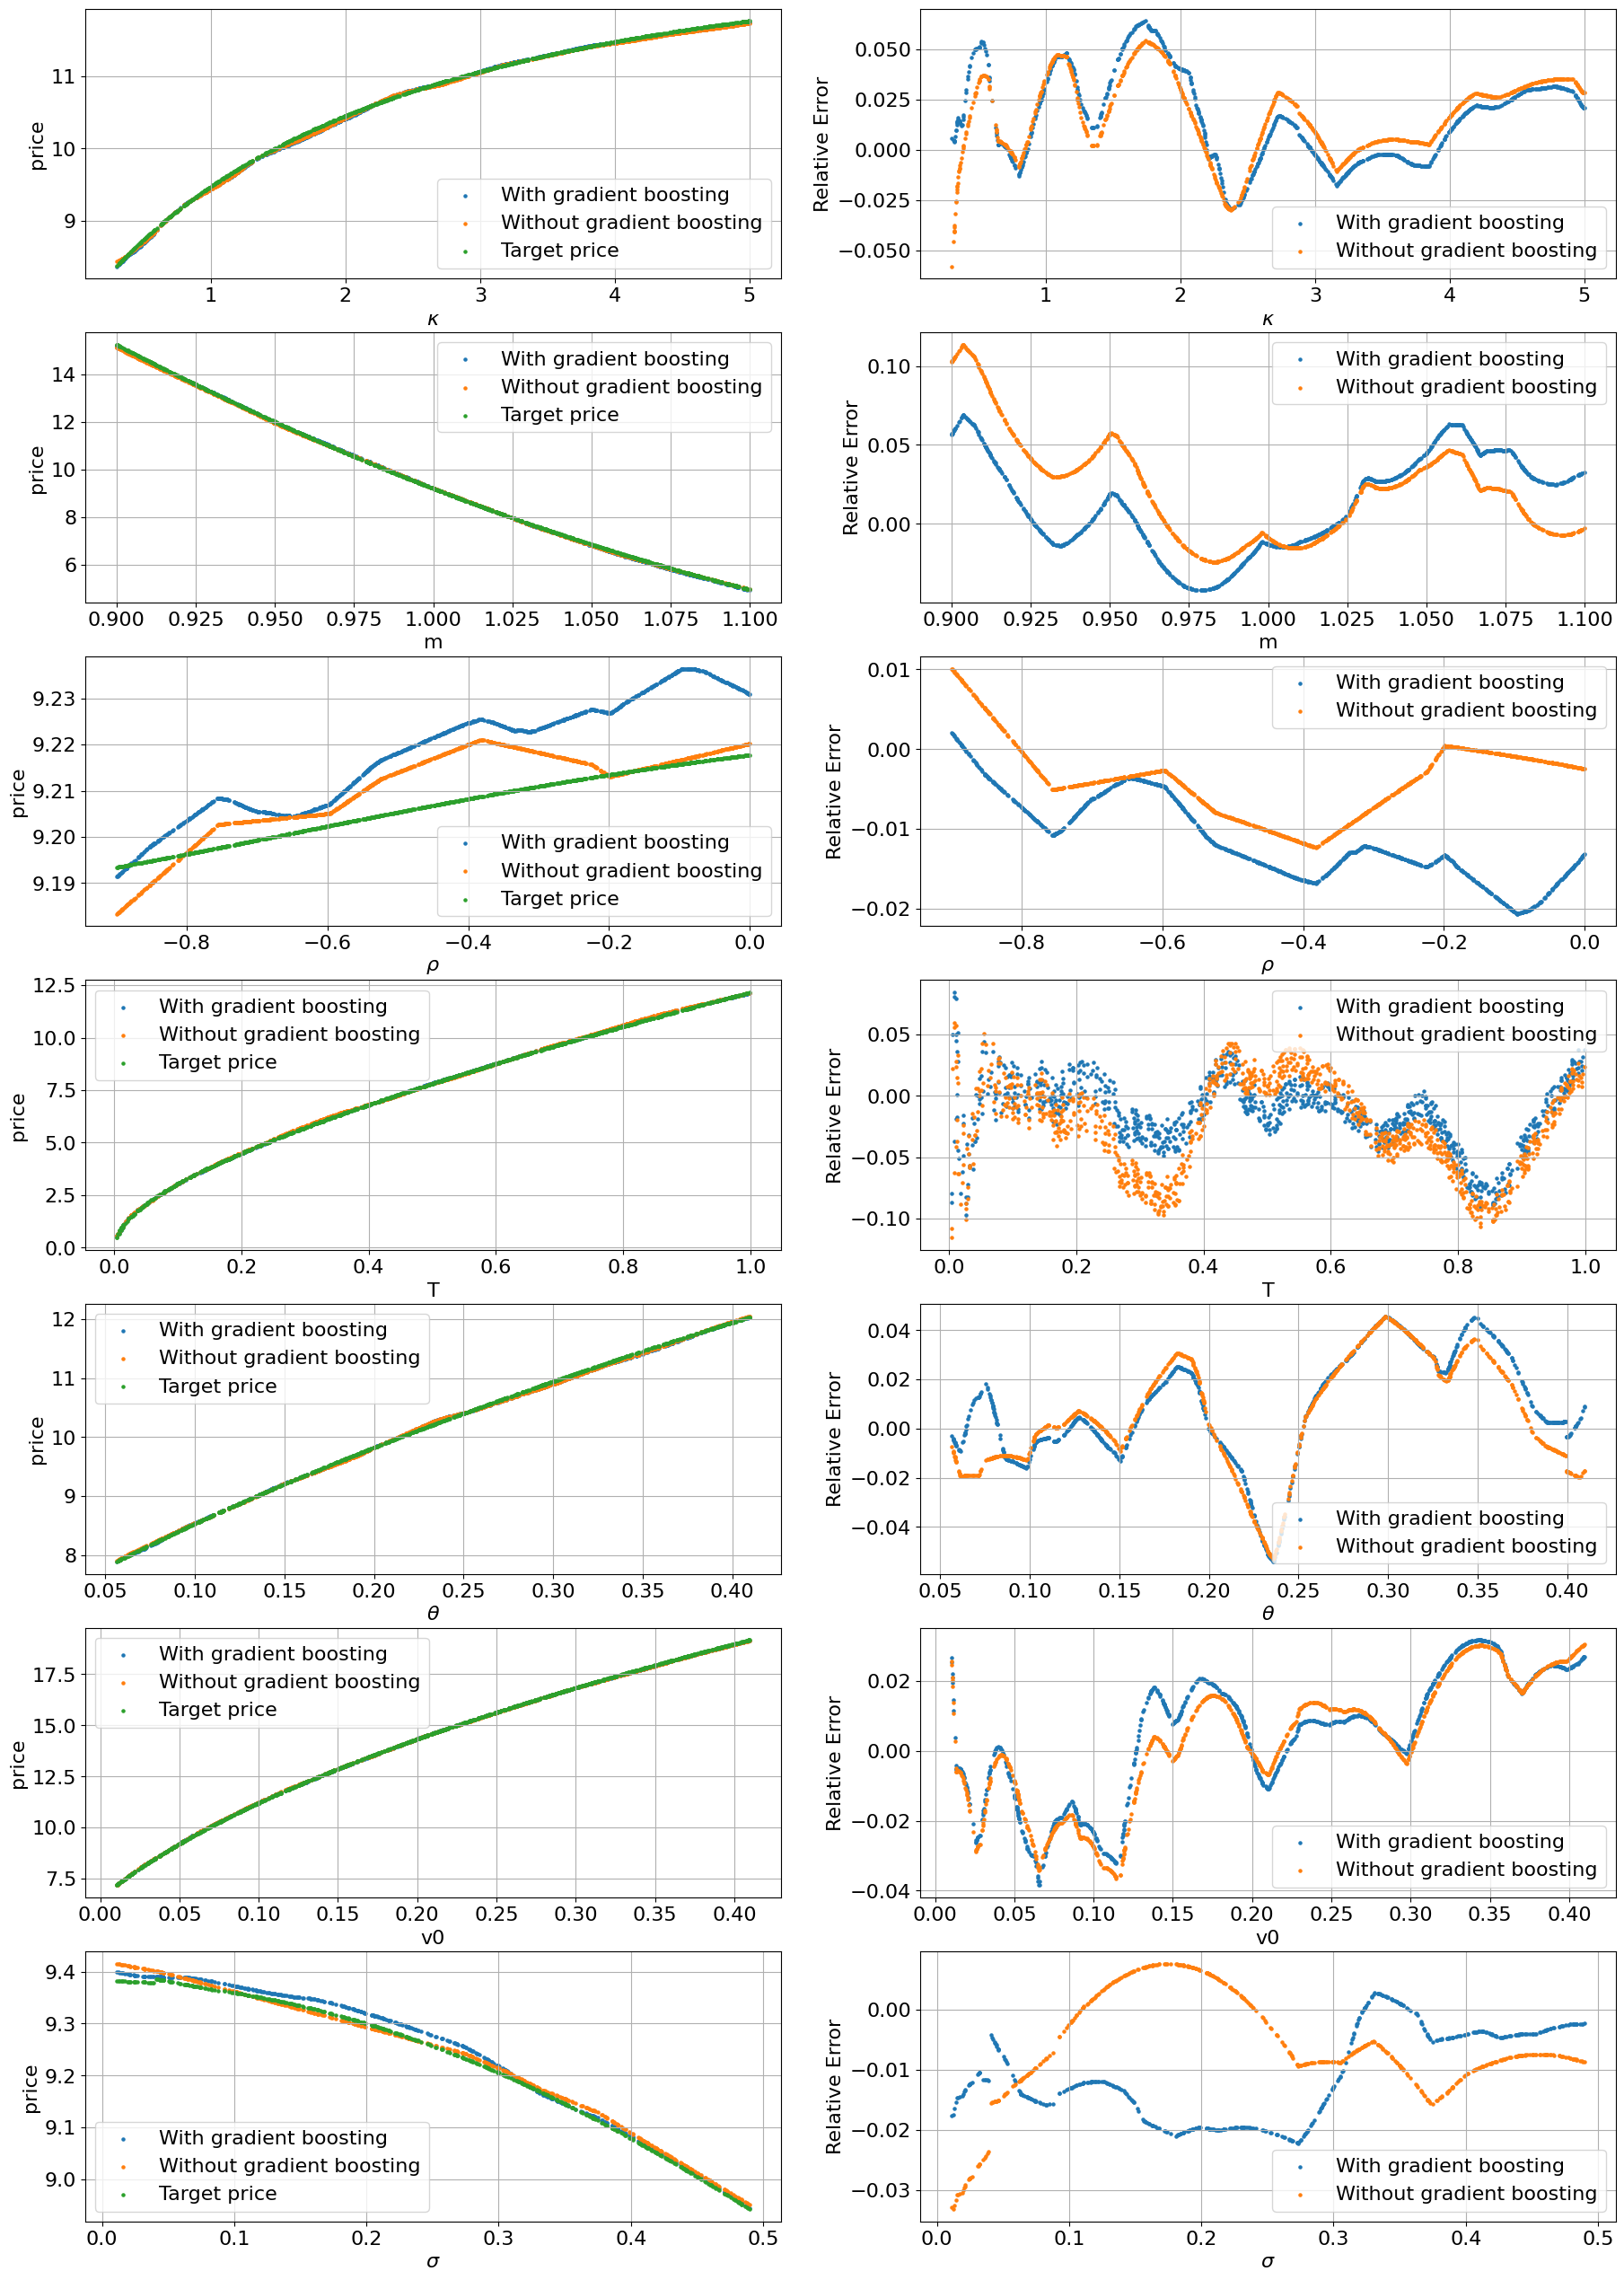

In [57]:
fig, ax = plt.subplots(7, 2, figsize=(22,32))
mapper = {'T': 'T', 'r': 'rf', 'q': 'q', 'v0': 'v0',
          'theta': r'$\theta$', 'kappa': r'$\kappa$', 
          'sigma': r'$\sigma$', 'rho': r'$\rho$',
          'm': 'm', "call_price": 'S0'}

for ind, i in enumerate(df['param'].unique()):
    print(i)

    tmp_df = df[df['param'] == i].copy()
    if i == 'vol_vol':
        i = 'sigma'
#     plt.figure(figsize=(6,2))
    ax[ind][0].scatter(tmp_df[i], tmp_df['pred'], s = 5, label='With gradient boosting')
    ax[ind][0].scatter(tmp_df[i], tmp_df['pred_wo'], s = 5, label='Without gradient boosting')
    ax[ind][0].scatter(tmp_df[i],tmp_df['call_price'], s=5, label = 'Target price')
#     ax[ind][0].title.set_text(mapper[i])
    ax[ind][0].set_xlabel(mapper[i])
    ax[ind][0].set_ylabel('price')
    ax[ind][0].grid()
    ax[ind][0].legend()
#     ax[i][0].show()
#     plt.figure(figsize=(6,2))
    ax[ind][1].scatter(tmp_df[i], tmp_df['error'], s = 5, label='With gradient boosting')
    ax[ind][1].scatter(tmp_df[i], tmp_df['error_wo'], s = 5, label='Without gradient boosting')
    ax[ind][1].set_xlabel(mapper[i])
    ax[ind][1].set_ylabel('Relative Error')
#     ax[ind][1].title.set_text(mapper[i])
    ax[ind][1].grid()
    ax[ind][1].legend()
plt.show()
